##### Sometimes ,there may exist some situtaions where we want to encode numerical data into catgorical data.To do this we have two types - 1) Discretization(binning) 2)Binarization.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [4]:
img=pltimg.imread('types-of-binning.png')

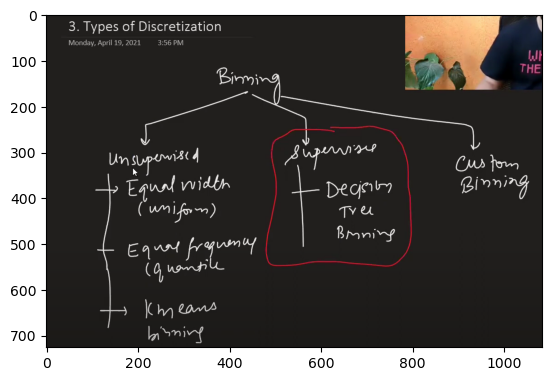

In [5]:
plt.imshow(img)

##### In scikit learn , we have KBinsDiscretizer class to apply binning proccess.It takes three arguments i.e one is no of bins ,second is strategy i.e we need to specify here which type of binning we will perform.Third arg is encoding where we need to specify whether resulting data should use ordinal or onehotencoding type.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [7]:
img=pltimg.imread('binning-class.png')

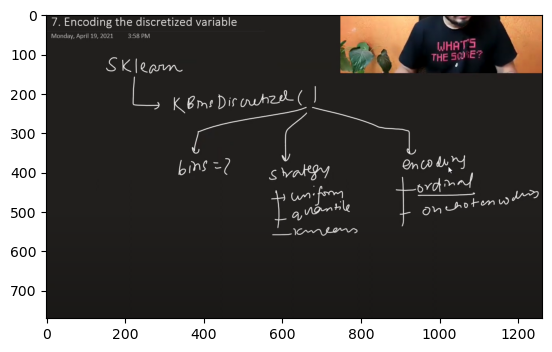

In [8]:
plt.imshow(img)

In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [11]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(714, 3)

In [14]:
df.head(15)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708
10,1,4.0,16.7000


In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [22]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6317097026604068

##### Now ,we will try to find the result after applying binning.

In [23]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [24]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [25]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

##### To get info of two transformers ,we can use trf.named_transformers_

In [31]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [32]:
trf.named_transformers_['first'].n_bins_

array([15])

In [33]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [34]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [35]:
output.sample(5)

,age,age_trf,fare,fare_trf
504,16.0,2.0,86.5000,13.0
833,23.0,5.0,7.8542,2.0
514,24.0,5.0,7.4958,1.0
328,31.0,8.0,20.5250,8.0
302,19.0,3.0,0.0000,0.0


##### Now , calculating accuracy score after applying binning.

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [37]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [38]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6303403755868544

##### Now .creating a func to apply different transformations of binning when no of bins and strategy is passed.